# Unit 5: Scraping Data#



In [1]:
# from shared import display_unit_toc
# display_unit_toc('notebook.ipynb')


Install [Google Chrome](https://www.google.com/chrome/) and [ChromeDriver](http://chromedriver.chromium.org)

In [2]:
import requests
import re
import time
from random import random
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common import keys
from selenium.webdriver.common.action_chains import ActionChains

# On my Mac
# driver = webdriver.Chrome('/Users/gfiddyment/bin/chromedriver')

# On this PC
# driver = webdriver.Chrome('C:/Users/KSB/Miniconda3/envs/itec696/Scripts/chromedriver.exe')


In [9]:
url = 'https://www.basketball-reference.com/wnba/years/2018.html'
driver.get(url)

In [ ]:
# Try finding and clicking elements on the page


In [ ]:
tables = driver.find_elements_by_tag_name('table')
len(tables)

# tables = driver.find_elements_by_tag_name('table')
# len(tables)

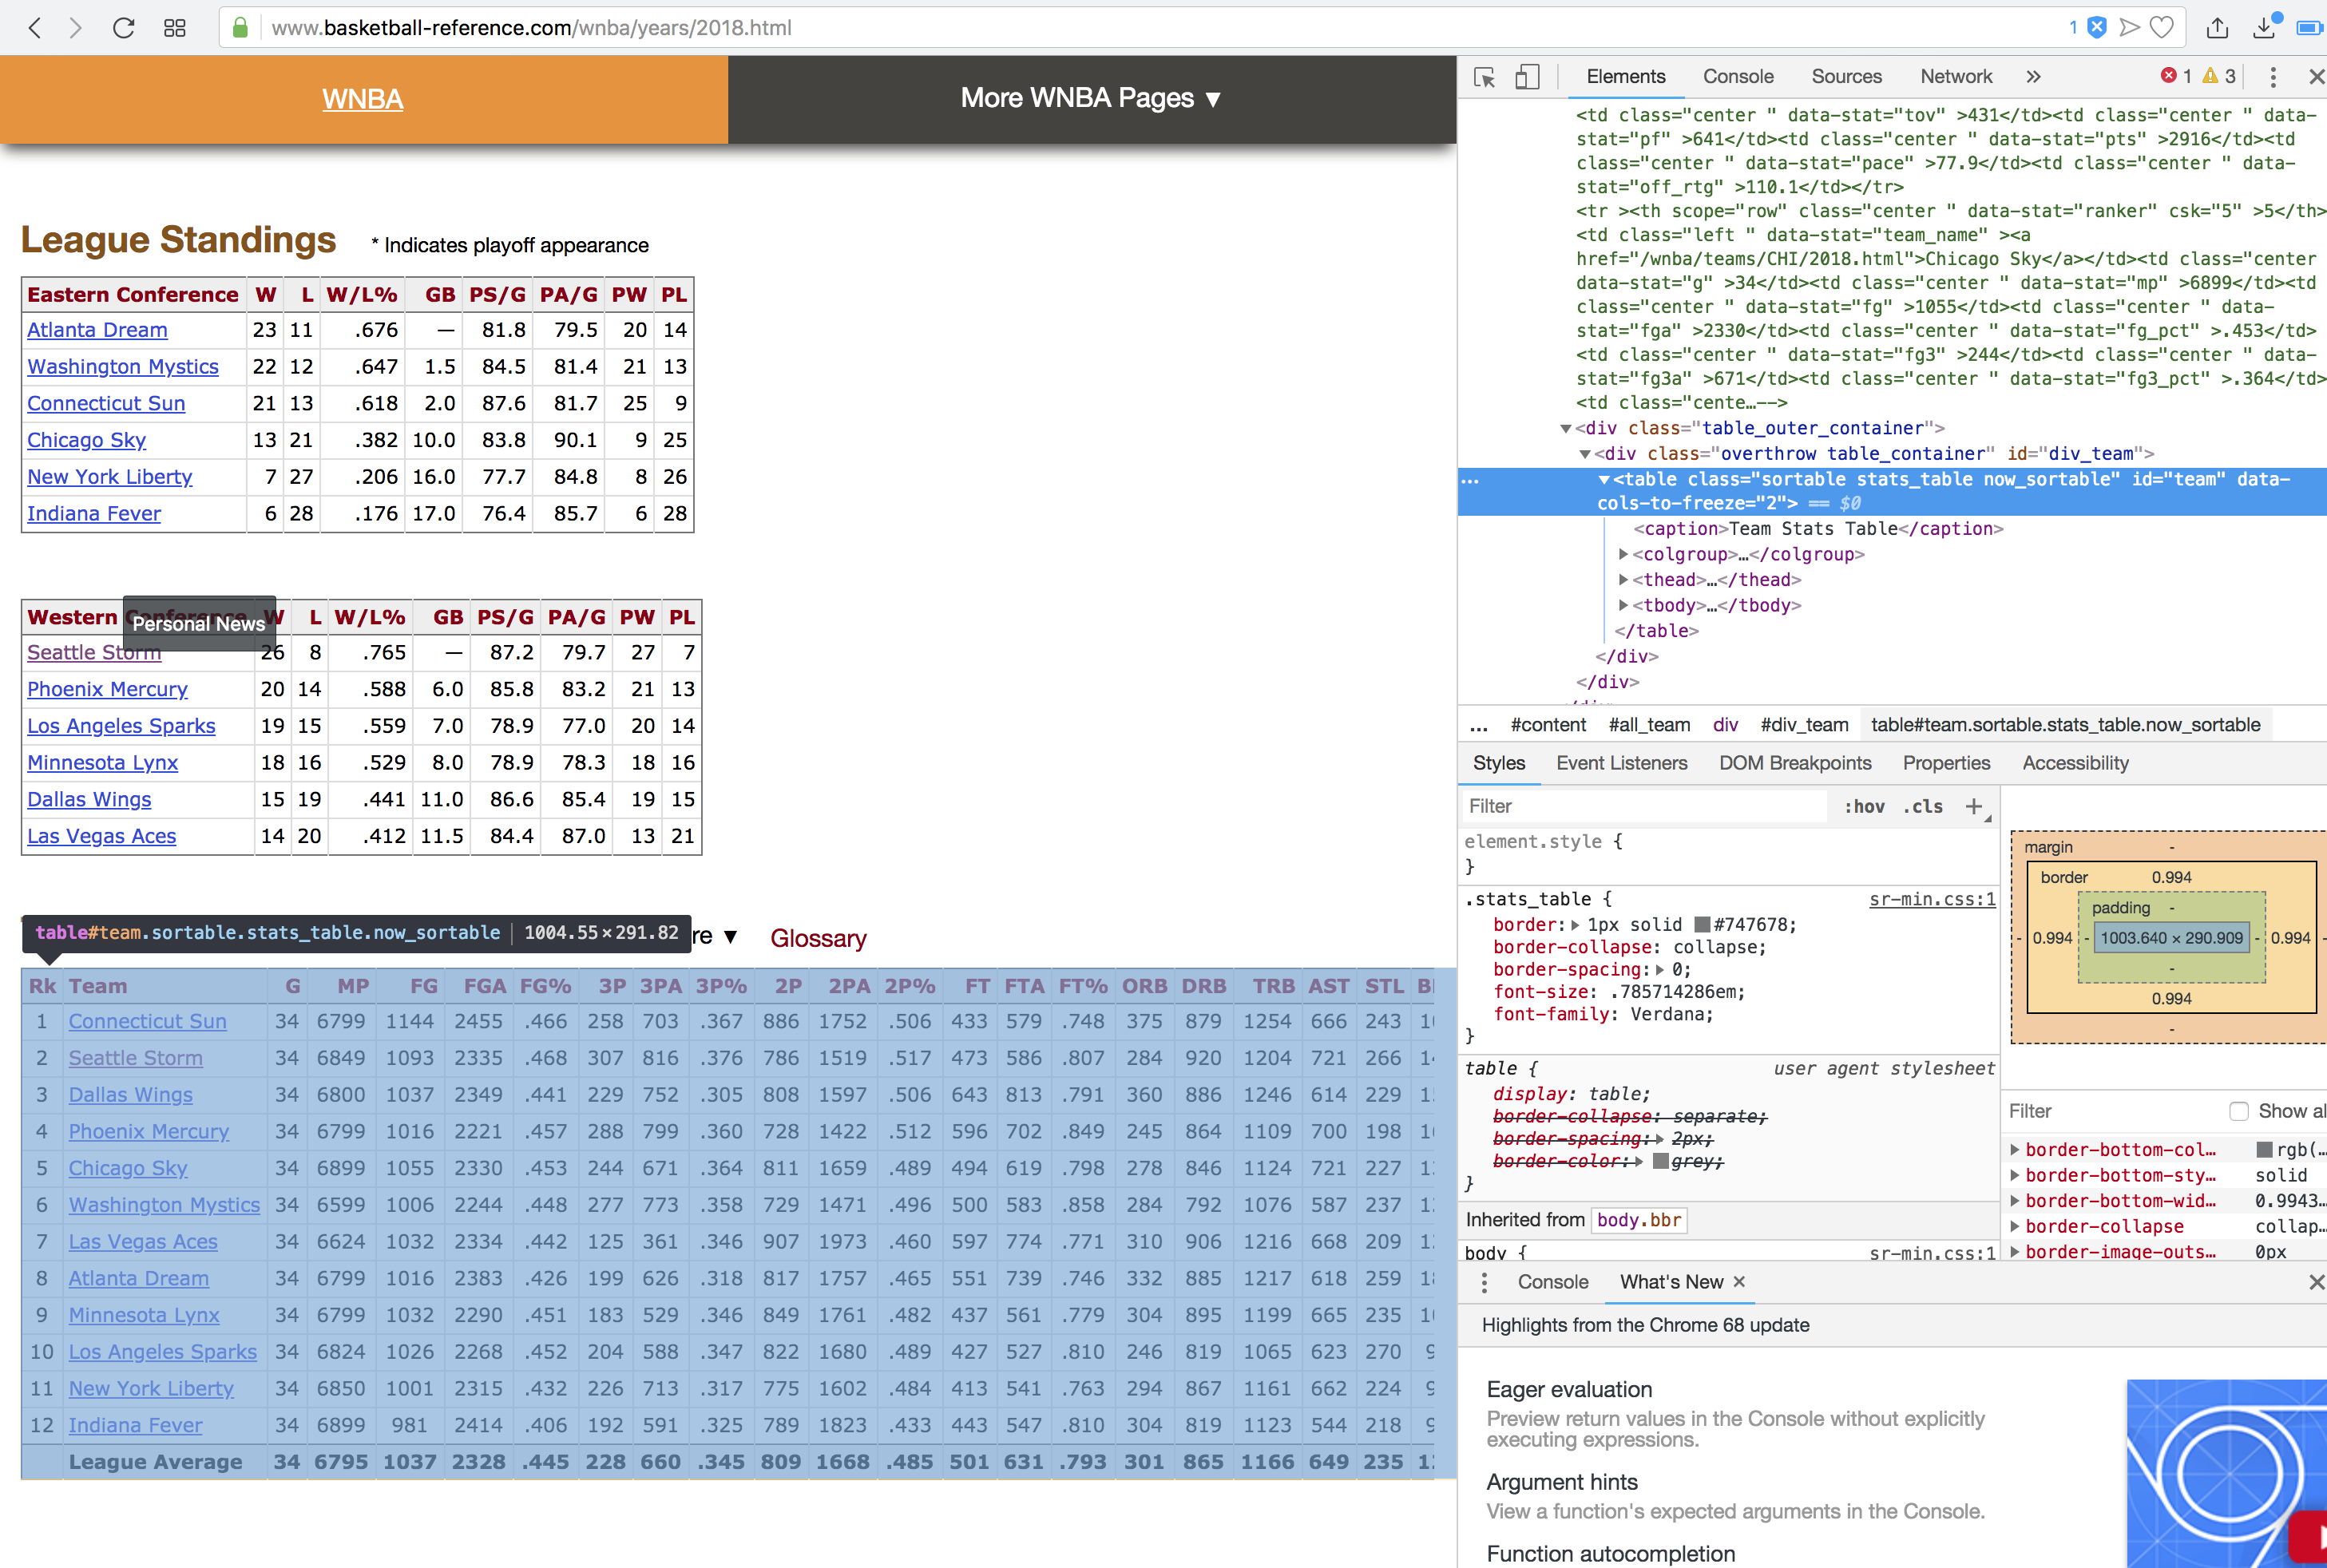

In [ ]:
# Getting data
table_html = driver.find_element_by_xpath('//table[@id="team"]')
rows = table_html.text.split('\n')
data = [r.split(' ') for r in rows if 'Rk' not in r and 'Average' not in r]

# Getting column names
headers = rows[0].split(' ')
headers.insert(1, 'City')
# headers

# Trying to combine column names + data
pd.DataFrame(data)
# pd.DataFrame(data, columns=headers)

In [ ]:
def parse_html(html):
    rows = html.split('\n')
    data = [r.split(' ') for r in rows[1:]]
    
    # TODO: Add names in here
    #data = [r.split(' ')[-8:] for r in rows[1:]]
    
    team_names_list = [r.split(' ')[1:-8] for r in rows]
    team_names = [' '.join(t) for t in team_names_list]

    headers = rows[0].split(' ')[1:]
    
    #for i, t in enumerate(team_names):
    #    data[i].insert(0, t)
    
    return data, headers

standings_E_html = driver.find_element_by_xpath('//table[@id="standings_E"]')
se_data, se_header = parse_html(standings_E_html.text)
# print(se_data)
# print(se_header)

df = pd.DataFrame(se_data)
# df = pd.DataFrame(se_data, columns=se_header)
df


In [ ]:
# Save standings to csv